In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('survey lung cancer.csv')

In [3]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
df.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [5]:
df.shape

(309, 16)

In [6]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

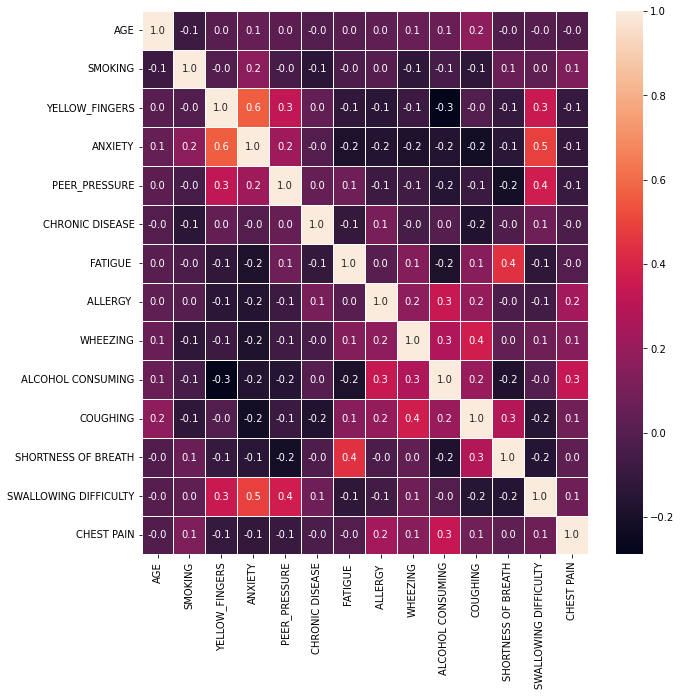

In [7]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt=".1f",ax=ax)
plt.show()

In [8]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

<Axes: xlabel='GENDER', ylabel='count'>

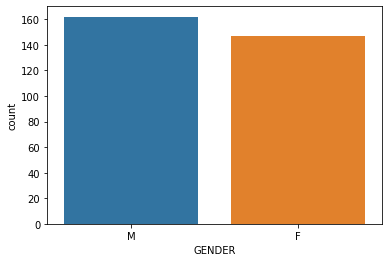

In [9]:
sns.countplot(data=df,x='GENDER',label='count')

In [10]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [11]:
df['GENDER']=df['GENDER'].apply({'M':0,'F':1}.get)
df['LUNG_CANCER']=df['LUNG_CANCER'].apply({'NO':0,'YES':1}.get)

In [12]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [13]:
df['LUNG_CANCER'].value_counts()

1    270
0     39
Name: LUNG_CANCER, dtype: int64

In [14]:
X = df.drop(columns='LUNG_CANCER',axis=1)
Y = df['LUNG_CANCER']
print(X)

     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         0   69        1               2        2              1   
1         0   74        2               1        1              1   
2         1   59        1               1        1              2   
3         0   63        2               2        2              1   
4         1   63        1               2        1              1   
..      ...  ...      ...             ...      ...            ...   
304       1   56        1               1        1              2   
305       0   70        2               1        1              1   
306       0   58        2               1        1              1   
307       0   67        2               1        2              1   
308       0   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2     

In [15]:
print(Y)

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int64


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('LUNG_CANCER', axis=1), df['LUNG_CANCER'], test_size=0.2, random_state=2)


In [17]:
print(X.shape,X_train.shape,X_test.shape)

(309, 15) (247, 15) (62, 15)


In [57]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

**KNN**

In [18]:
k = 20
knn = KNeighborsClassifier(n_neighbors=k)

In [19]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=20)

In [20]:
y_pred = knn.predict(X_test)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [21]:
test1_data_accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", test1_data_accuracy)


Accuracy: 0.8548387096774194


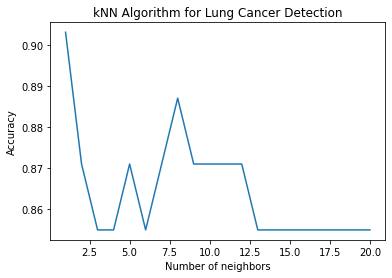

In [22]:
neighbors = list(range(1, 21))
accuracies = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    accuracies.append(accuracy)
plt.plot(neighbors, accuracies)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.title("kNN Algorithm for Lung Cancer Detection")
plt.show()

**Random** **Forest** **Algorithm**

In [23]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
print(y_pred)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1]


In [24]:
test2_data_accuracy = accuracy_score(Y_test, y_pred)
print('Accuracy:', test2_data_accuracy)

Accuracy: 0.9032258064516129


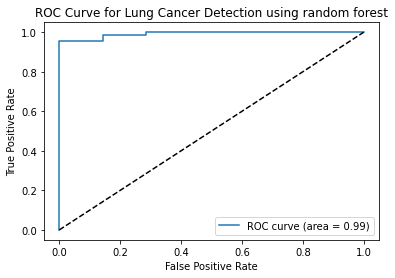

In [25]:
X = df.drop(columns='LUNG_CANCER',axis=1)
Y = df['LUNG_CANCER']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, Y_train)


y_prob = rfc.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Lung Cancer Detection using random forest')
plt.legend(loc="lower right")
plt.show()

**Decision** **Tree** **Algorithm**

In [26]:

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, Y_train)
y_pred = dt_classifier.predict(X_test)

In [27]:
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1]


In [28]:
test3_data_accuracy = accuracy_score(Y_test, y_pred)
print('Accuracy:', test3_data_accuracy)

Accuracy: 0.9247311827956989


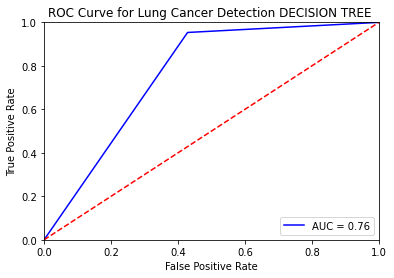

In [29]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.title('ROC Curve for Lung Cancer Detection DECISION TREE ')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Logistic** **Regression**

In [30]:
model = LogisticRegression()
model.fit(X_train, Y_train)


LogisticRegression()

In [31]:
y_pred = model.predict(X_test)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1]


In [32]:
test4_data_accuracy= accuracy_score(Y_test, y_pred)
cm = confusion_matrix(Y_test, y_pred)

print("Accuracy:", test4_data_accuracy)
print("Confusion matrix:\n", cm)



Accuracy: 0.978494623655914
Confusion matrix:
 [[ 5  2]
 [ 0 86]]


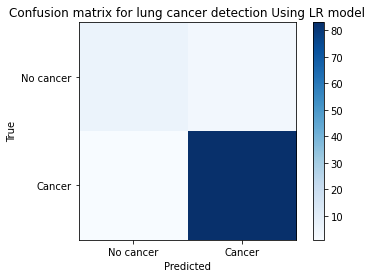

In [33]:
X = df.drop(columns='LUNG_CANCER',axis=1)
Y = df['LUNG_CANCER']
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('LUNG_CANCER', axis=1), df['LUNG_CANCER'], test_size=0.3)

model = LogisticRegression()


model.fit(X_train, Y_train)


y_pred = model.predict(X_test)


cm = confusion_matrix(Y_test, y_pred)


plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion matrix for lung cancer detection Using LR model')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No cancer', 'Cancer'])
plt.yticks(tick_marks, ['No cancer', 'Cancer'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**NB** **Bayes**

In [34]:
clf = GaussianNB()
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
print(y_pred)

[1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1]


In [54]:
test5_data_accuracy = accuracy_score(Y_test, y_pred)
print('Accuracy:', test5_data_accuracy)

Accuracy: 0.956989247311828


In [35]:
conf_matrix = confusion_matrix(Y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

Confusion Matrix:
 [[ 5  4]
 [ 2 82]]


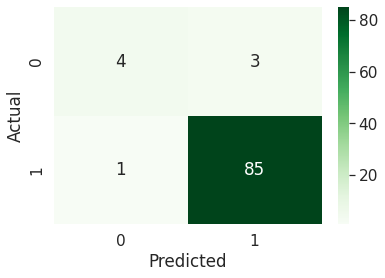

In [36]:
X = df.drop(columns='LUNG_CANCER',axis=1)
Y = df['LUNG_CANCER']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


clf = GaussianNB()


clf.fit(X_train, Y_train)


y_pred = clf.predict(X_test)


cm = confusion_matrix(Y_test, y_pred)


sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='g', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**SVM** **model**

In [37]:
model2=SVC()
model2.fit(X_train,Y_train)

SVC()

In [38]:
model2.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [39]:
X_train_prediction = model2.predict(X_train)
training2_data_accuracy = accuracy_score(X_train_prediction,Y_train)
print('Accuracy on Training data : ',training2_data_accuracy)

Accuracy on Training data :  0.8518518518518519


In [40]:
X_test_prediction = model2.predict(X_test)
test6_data_accuracy = accuracy_score(X_test_prediction,Y_test)
print('Accuracy on Test data : ',test6_data_accuracy)

Accuracy on Test data :  0.9247311827956989


**Gradient** **boosting**

In [41]:
model3=GradientBoostingClassifier()
model3.fit(X_train,Y_train)

GradientBoostingClassifier()

In [42]:
model3.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [43]:
X_train_prediction = model3.predict(X_train)
training3_data_accuracy = accuracy_score(X_train_prediction,Y_train)
print('Accuracy on Training data : ',training3_data_accuracy)

Accuracy on Training data :  0.9953703703703703


In [44]:
X_test_prediction = model3.predict(X_test)
test7_data_accuracy = accuracy_score(X_test_prediction,Y_test)
print('Accuracy on Test data : ',test7_data_accuracy)

Accuracy on Test data :  0.956989247311828


**Kflod**

In [45]:
def get_score(model,X_train,X_test,Y_train,Y_test):
    model.fit(X_train,Y_train)
    return model.score(X_test,Y_test)

In [46]:
get_score(LogisticRegression(),X_train,X_test,Y_train,Y_test)

0.978494623655914

In [47]:
get_score(RandomForestClassifier(max_depth=5),X_train,X_test,Y_train,Y_test)

0.956989247311828

In [48]:
get_score(SVC(),X_train,X_test,Y_train,Y_test)

0.9247311827956989

In [49]:
get_score(GradientBoostingClassifier(),X_train,X_test,Y_train,Y_test)

0.956989247311828

In [50]:
get_score(GaussianNB(),X_train,X_test,Y_train,Y_test)

0.956989247311828

In [51]:
get_score(KNeighborsClassifier(),X_train,X_test,Y_train,Y_test)

0.9354838709677419

In [52]:
get_score(DecisionTreeClassifier(),X_train,X_test,Y_train,Y_test)

0.9247311827956989

In [55]:
model_ev=pd.DataFrame({'Model':[' K Nearest Neighbors','Random Forest','Decision Tree ',' Logistic Regression ','Naive Bayes','Supprt Vector Machine','Stochastic Gradient Boosting'],'Accuracy':[test1_data_accuracy*100,test2_data_accuracy*100,test3_data_accuracy*100,test4_data_accuracy*100,test5_data_accuracy*100,test6_data_accuracy*100,test7_data_accuracy*100]})
model_ev

,Model,Accuracy
0,K Nearest Neighbors,85.483871
1,Random Forest,90.322581
2,Decision Tree,92.473118
3,Logistic Regression,97.849462
4,Naive Bayes,95.698925
5,Supprt Vector Machine,92.473118
6,Stochastic Gradient Boosting,95.698925


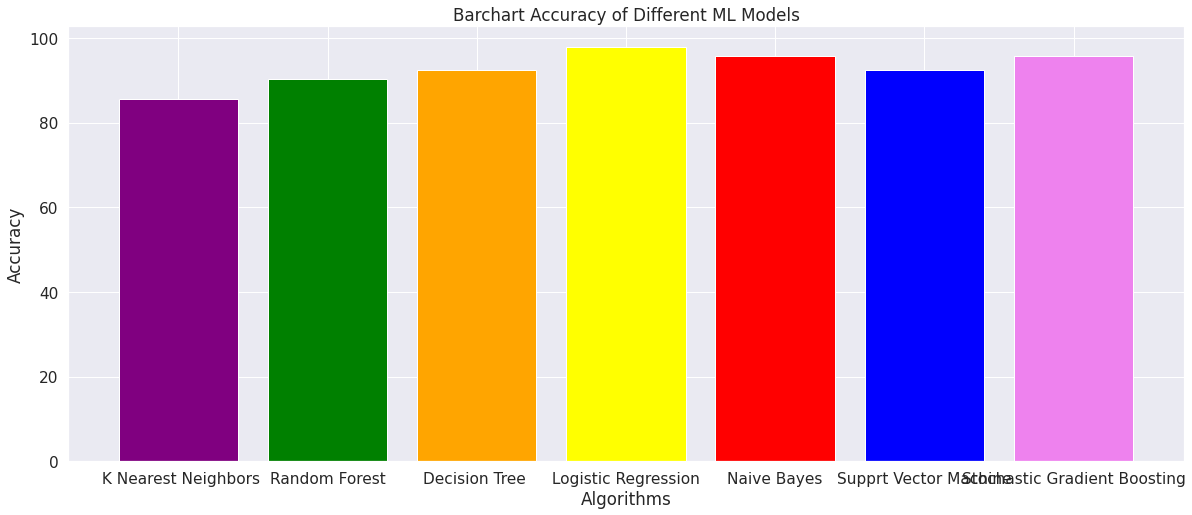

In [56]:
colors=['purple','green','orange','yellow','red','blue','violet']
plt.figure(figsize=(20,8))
plt.title("Barchart Accuracy of Different ML Models")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color=colors)
plt.show()

In [58]:
import pickle
pickle.dump(model,open('model.pkl','wb'))
pickle.dump(sc,open('sc.pkl','wb'))